In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


5


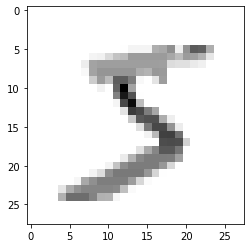

In [9]:
print(y_train[0])
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [8]:
x_train_normalised = tf.keras.utils.normalize(x_train)
x_test_normalised = tf.keras.utils.normalize(x_train)

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(x_train_normalised, y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2580 - accuracy: 0.9233


In [13]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 811us/step - loss: 59.5169 - accuracy: 0.9475
59.516937255859375
0.9474999904632568


In [14]:
model.save('epic_num_reader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [15]:
model = tf.keras.models.load_model('epic_num_reader.model')

In [17]:
predictions = model.predict(x_test)

In [18]:
predictions.shape

(10000, 10)

In [25]:
p = tf.math.argmax(predictions, axis = 1)

In [26]:
p.numpy()

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

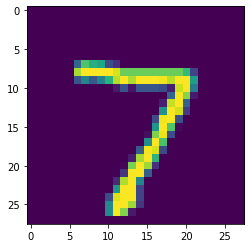

In [24]:
plt.imshow(x_test[0])